In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/MB_6489/Desktop/Tes_Task_PA/analytics_test_case.csv')
data['split_group'].unique()
data['split_group'] = data['split_group'].fillna('Out_of_Test')
data['split_group'].unique()

array(['Out_of_Test', 0.0, 1.0], dtype=object)

In [2]:
data

,date,users,revenue,split_group,gender,os_version,age_group,country_group
0,2024-03-01,1077,3770.39,Out_of_Test,male,1,45+,USA
1,2024-03-01,744,1060.22,Out_of_Test,male,1,45+,Tier_1
2,2024-03-01,657,979.49,Out_of_Test,male,1,45+,Other
3,2024-03-01,251,548.77,Out_of_Test,male,1,45-,USA
4,2024-03-01,143,604.85,Out_of_Test,male,1,45-,Tier_1
...,...,...,...,...,...,...,...,...
5203,2024-05-31,678,3186.00,1.0,female,3,45+,Tier_1
5204,2024-05-31,361,862.34,1.0,female,3,45+,Other
5205,2024-05-31,237,874.15,1.0,female,3,45-,USA
5206,2024-05-31,277,530.04,1.0,female,3,45-,Tier_1


In [3]:
data['date'] = pd.to_datetime(data['date'])
data['period'] = np.where(data['date'] < pd.Timestamp('2024-05-16'), 'Before_2024-05-16', 'After_2024-05-16')
data

,date,users,revenue,split_group,gender,os_version,age_group,country_group,period
0,2024-03-01,1077,3770.39,Out_of_Test,male,1,45+,USA,Before_2024-05-16
1,2024-03-01,744,1060.22,Out_of_Test,male,1,45+,Tier_1,Before_2024-05-16
2,2024-03-01,657,979.49,Out_of_Test,male,1,45+,Other,Before_2024-05-16
3,2024-03-01,251,548.77,Out_of_Test,male,1,45-,USA,Before_2024-05-16
4,2024-03-01,143,604.85,Out_of_Test,male,1,45-,Tier_1,Before_2024-05-16
...,...,...,...,...,...,...,...,...,...
5203,2024-05-31,678,3186.00,1.0,female,3,45+,Tier_1,After_2024-05-16
5204,2024-05-31,361,862.34,1.0,female,3,45+,Other,After_2024-05-16
5205,2024-05-31,237,874.15,1.0,female,3,45-,USA,After_2024-05-16
5206,2024-05-31,277,530.04,1.0,female,3,45-,Tier_1,After_2024-05-16


In [4]:
result = data.groupby(['split_group', 'period']).agg(
    total_revenue=('revenue', 'sum'),
    total_users=('users', 'sum')
).reset_index()
result

,split_group,period,total_revenue,total_users
0,0.0,After_2024-05-16,888641.560,239317
1,0.0,Before_2024-05-16,3693667.680,916405
2,1.0,After_2024-05-16,1002521.495,238169
3,1.0,Before_2024-05-16,4466748.230,928529
4,Out_of_Test,Before_2024-05-16,1518738.990,413409


In [5]:
grouped = data.groupby(['split_group', 'period']).agg(
    total_revenue=('revenue', 'sum'),
    unique_days=('date', 'nunique')
).reset_index()

grouped['average_revenue_per_day'] = grouped['total_revenue'] / grouped['unique_days']
grouped

,split_group,period,total_revenue,unique_days,average_revenue_per_day
0,0.0,After_2024-05-16,888641.560,16,55540.097500
1,0.0,Before_2024-05-16,3693667.680,62,59575.285161
2,1.0,After_2024-05-16,1002521.495,16,62657.593437
3,1.0,Before_2024-05-16,4466748.230,62,72044.326290
4,Out_of_Test,Before_2024-05-16,1518738.990,14,108481.356429


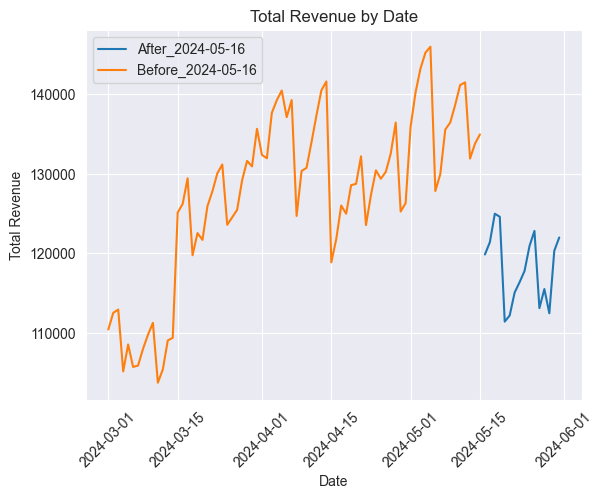

Average revenue before: 127357.30
Average revenue after: 118197.69
Potential general loss: 9159.61
0.07192057529216722


In [6]:
overview = data.groupby(['date', 'period']).agg(
    total_revenue=('revenue', 'sum')
).reset_index()

fig, ax = plt.subplots()
for period, group_data in overview.groupby('period'):
    ax.plot(group_data['date'], group_data['total_revenue'], label=period)
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue by Date')
ax.legend()
# plt.savefig('C:/Users/MB_6489/Desktop/Tes_Task_PA/overview.png', dpi = 500, bbox_inches='tight', transparent=True)
plt.show()

average_revenue_before = overview[overview['period'] == 'Before_2024-05-16']['total_revenue'].mean()
average_revenue_after = overview[overview['period'] == 'After_2024-05-16']['total_revenue'].mean()
potential_loss = average_revenue_before - average_revenue_after

print(f"Average revenue before: {average_revenue_before:.2f}")
print(f"Average revenue after: {average_revenue_after:.2f}")
print(f"Potential general loss: {potential_loss:.2f}")
print(potential_loss/average_revenue_before)

C:\Users\MB_6489\AppData\Local\Temp\ipykernel_11672\631917180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Period_2', y='revenue', data=mean_revenue, palette='viridis')


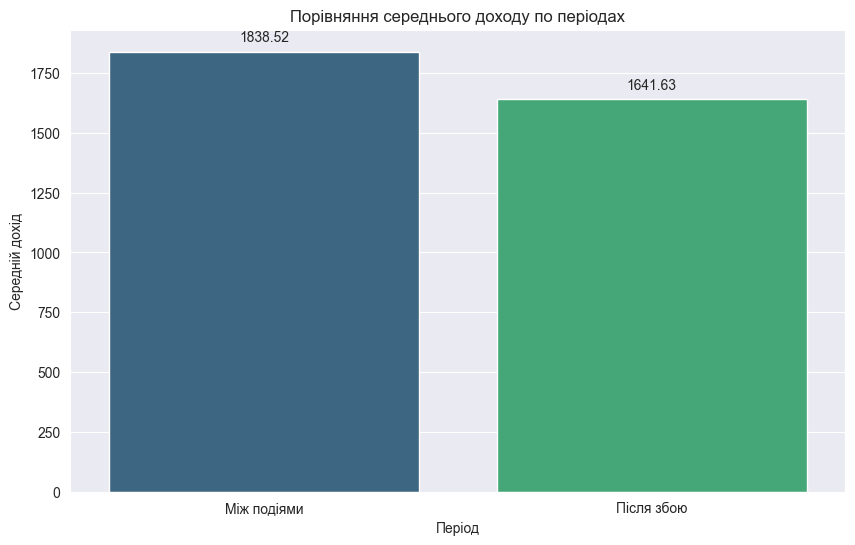

In [7]:
data_after_release = data[data['date'] >= pd.Timestamp('2024-04-15')].copy()
data_after_release['date'] = pd.to_datetime(data_after_release['date'])
data_after_release['Period_2'] = np.where(data_after_release['date'] < pd.Timestamp('2024-05-16'), 'Між подіями', 'Після збою')
data_after_release

mean_revenue = data_after_release.groupby('Period_2')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Period_2', y='revenue', data=mean_revenue, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.xlabel('Період')
plt.ylabel('Середній дохід')
plt.title('Порівняння середнього доходу по періодах')
plt.savefig('C:/Users/MB_6489/Desktop/Tes_Task_PA/comparison.png', dpi = 500, bbox_inches='tight', transparent=True)
plt.show()

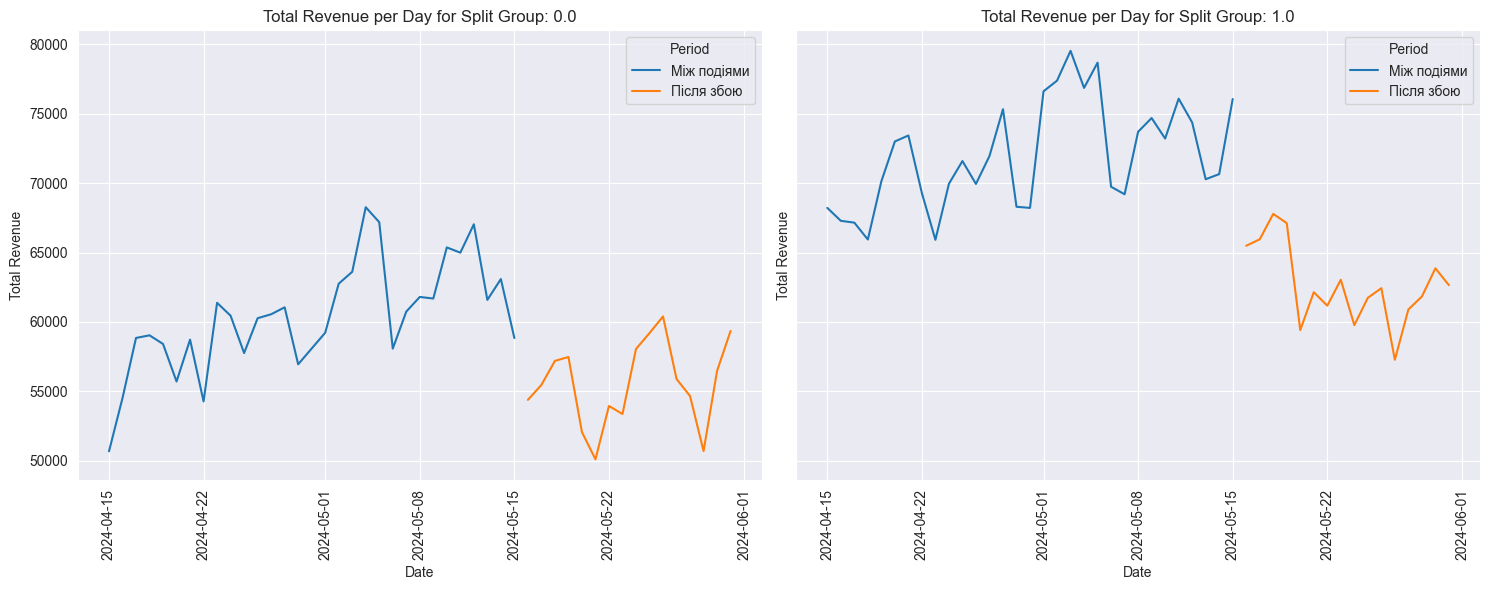

In [9]:
grouped = data_after_release[data_after_release['split_group'] != 'Out_of_Test'].groupby(['split_group', 'date', 'Period_2']).agg(
    total_revenue=('revenue', 'sum')
).reset_index()

split_groups = grouped['split_group'].unique()
fig, axs = plt.subplots(1, len(split_groups), figsize=(15, 6), sharex=True, sharey=True)

if len(split_groups) == 1:
    axs = [axs]

for ax, split_group in zip(axs, split_groups):
    group_data = grouped[grouped['split_group'] == split_group]
    for period, period_data in group_data.groupby('Period_2'):
        ax.plot(period_data['date'], period_data['total_revenue'], label=period)
    ax.set_title(f'Total Revenue per Day for Split Group: {split_group}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Revenue')
    ax.legend(title='Period')
    ax.tick_params(axis='x', labelrotation=90) 
plt.savefig('C:/Users/MB_6489/Desktop/Tes_Task_PA/split_groups.png', dpi = 500, bbox_inches='tight', transparent=True)

plt.tight_layout()
plt.show()